In [1]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = load_boston()

In [3]:
X = data.data
y = data.target

In [4]:
X_train = X[:450]
y_train = y[:450]
X_test = X[450:]
y_test = y[450:]

In [5]:
m = np.zeros(X.shape[1])
L = np.eye(X.shape[1])

(array([ 9., 21., 15., 11.,  7.,  2.,  1.,  2., 22., 15., 28., 38., 55.,
        97., 50., 42., 27.,  4.,  3.,  1.]),
 array([-1137.68397703, -1103.96511577, -1070.24625452, -1036.52739326,
        -1002.808532  ,  -969.08967074,  -935.37080948,  -901.65194823,
         -867.93308697,  -834.21422571,  -800.49536445,  -766.7765032 ,
         -733.05764194,  -699.33878068,  -665.61991942,  -631.90105816,
         -598.18219691,  -564.46333565,  -530.74447439,  -497.02561313,
         -463.30675187]),
 <a list of 20 Patch objects>)

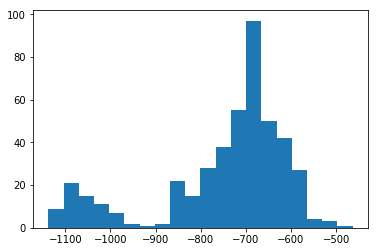

In [6]:
w = multivariate_normal.rvs(mean=m, cov=L)
y = np.dot(X_train, w.reshape(-1, 1))

plt.hist(y, bins=20)

(array([ 8., 11., 18., 29., 33., 35., 67., 63., 65., 12., 23., 17., 16.,
        14.,  7.,  1.,  5.,  5.,  2., 19.]),
 array([ 5.  ,  7.25,  9.5 , 11.75, 14.  , 16.25, 18.5 , 20.75, 23.  ,
        25.25, 27.5 , 29.75, 32.  , 34.25, 36.5 , 38.75, 41.  , 43.25,
        45.5 , 47.75, 50.  ]),
 <a list of 20 Patch objects>)

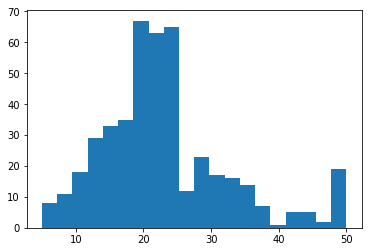

In [7]:
plt.hist(y_train, bins=20)

In [8]:
l = 10.0
L_hat = L
m_hat = np.dot(L, m.reshape(-1, 1))

for i in range(X_train.shape[0]):
    L_hat += l * np.dot(X_train[i].reshape(-1, 1), X_train[i].reshape(1, -1))
    m_hat += l * y_train[i] * X_train[i].reshape(-1, 1)
    
m_hat = np.dot(np.linalg.inv(L_hat), m_hat) 

(array([ 8., 11., 18., 29., 33., 35., 67., 63., 65., 12., 23., 17., 16.,
        14.,  7.,  1.,  5.,  5.,  2., 19.]),
 array([ 5.  ,  7.25,  9.5 , 11.75, 14.  , 16.25, 18.5 , 20.75, 23.  ,
        25.25, 27.5 , 29.75, 32.  , 34.25, 36.5 , 38.75, 41.  , 43.25,
        45.5 , 47.75, 50.  ]),
 <a list of 20 Patch objects>)

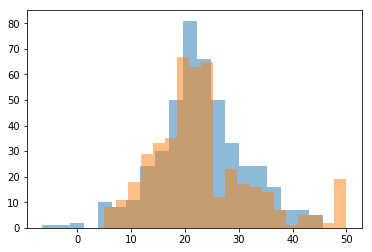

In [9]:
w = multivariate_normal.rvs(mean=m_hat.ravel(), cov=np.linalg.inv(L_hat))
y = np.dot(X_train, w.reshape(-1, 1))

plt.hist(y, bins=20, alpha=0.5)
plt.hist(y_train, bins=20, alpha=0.5)

(0, 60)

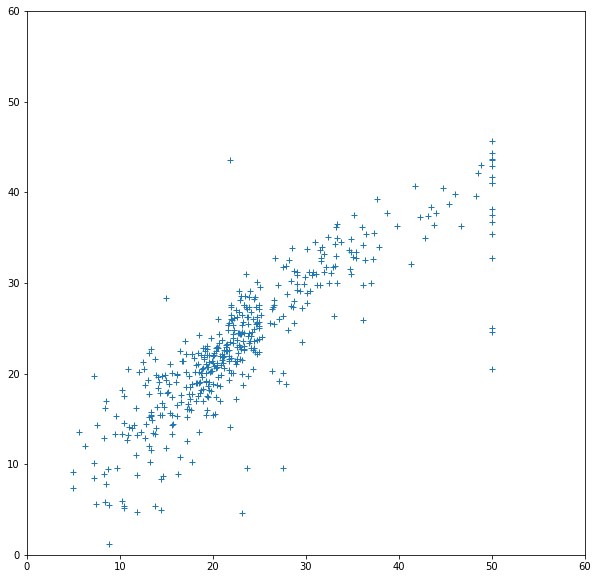

In [10]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 10))
ax.plot(y_train, y, "+")

ax.set_xlim([0, 60])
ax.set_ylim([0, 60])

In [11]:
y_pred = []
y_err = []
L_hat_inv = np.linalg.inv(L_hat)
for i in range(X_train.shape[0]):
    y_pred.append(np.dot(X_train[i].reshape(1, -1), m_hat))
    _ = np.dot(X_train[i].reshape(1, -1), L_hat_inv)
    y_err.append(1000.0 * np.dot(_, X_train[i].reshape(-1, 1)))

<Container object of 3 artists>

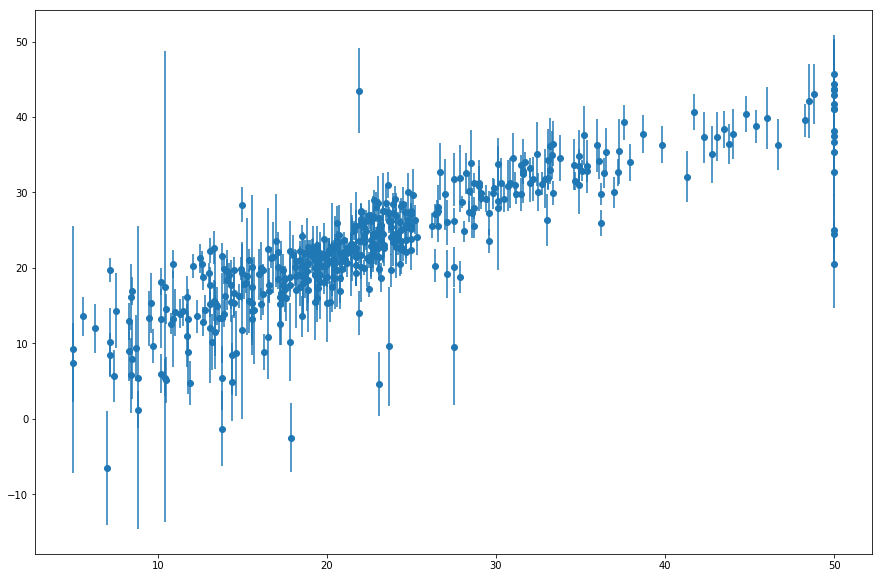

In [12]:
fig, ax = plt.subplots(ncols=1, figsize=(15, 10))
ax.errorbar(y_train, y_pred, yerr=y_err, fmt="o")

(array([ 2.,  0.,  0.,  0.,  3.,  5.,  4.,  3.,  3.,  4.,  5., 11.,  6.,
         2.,  5.,  2.,  0.,  0.,  0.,  1.]),
 array([ 7.  ,  8.14,  9.28, 10.42, 11.56, 12.7 , 13.84, 14.98, 16.12,
        17.26, 18.4 , 19.54, 20.68, 21.82, 22.96, 24.1 , 25.24, 26.38,
        27.52, 28.66, 29.8 ]),
 <a list of 20 Patch objects>)

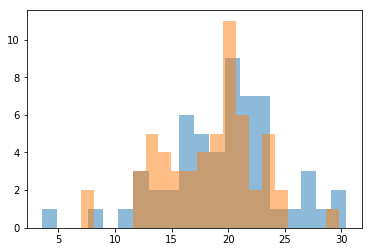

In [13]:
w = multivariate_normal.rvs(mean=m_hat.ravel(), cov=np.linalg.inv(L_hat))
y = np.dot(X_test, w.reshape(-1, 1))

plt.hist(y, bins=20, alpha=0.5)
plt.hist(y_test, bins=20, alpha=0.5)

(0, 60)

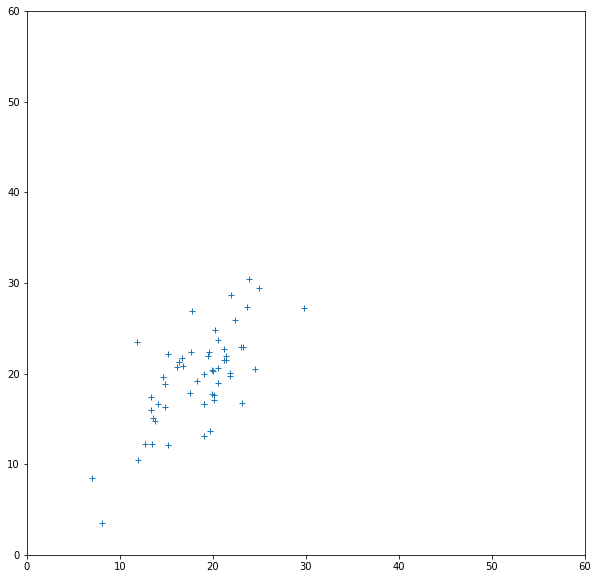

In [14]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 10))
ax.plot(y_test, y, "+")

ax.set_xlim([0, 60])
ax.set_ylim([0, 60])

In [15]:
y_pred = []
y_err = []
L_hat_inv = np.linalg.inv(L_hat)
for i in range(X_test.shape[0]):
    y_pred.append(np.dot(X_test[i].reshape(1, -1), m_hat))
    _ = np.dot(X_test[i].reshape(1, -1), L_hat_inv)
    y_err.append(1000.0 * np.dot(_, X_test[i].reshape(-1, 1)))

<Container object of 3 artists>

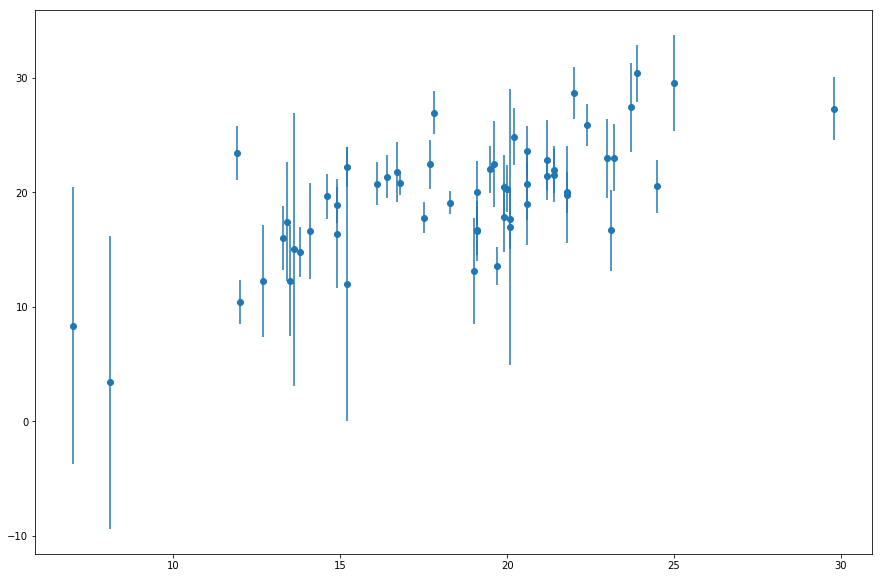

In [16]:
fig, ax = plt.subplots(ncols=1, figsize=(15, 10))
ax.errorbar(y_test, y_pred, yerr=y_err, fmt="o")